In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

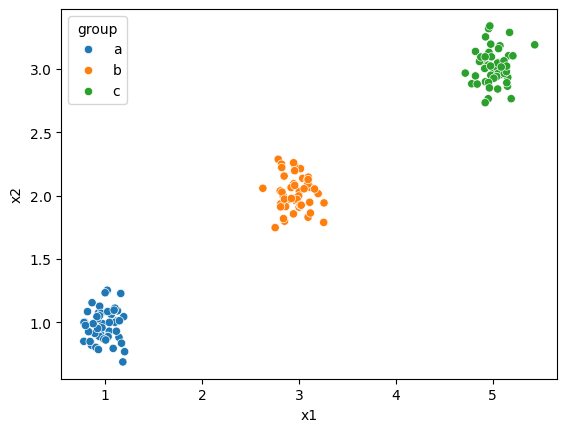

In [14]:
sns.scatterplot(data = df0_125, x = "x1",y = "x2", hue = "group")

<Axes: xlabel='x1', ylabel='x2'>

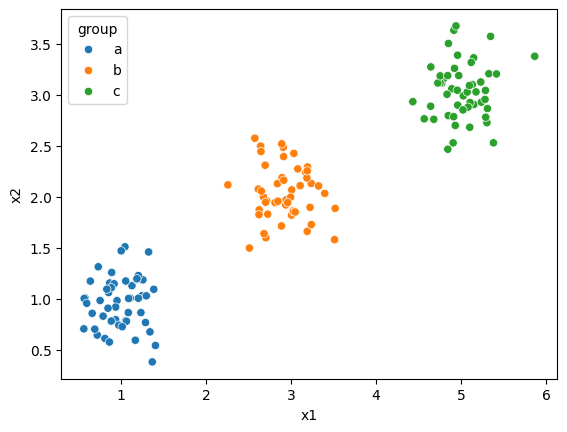

In [15]:
sns.scatterplot(data = df0_25, x = "x1",y = "x2", hue = "group")

<Axes: xlabel='x1', ylabel='x2'>

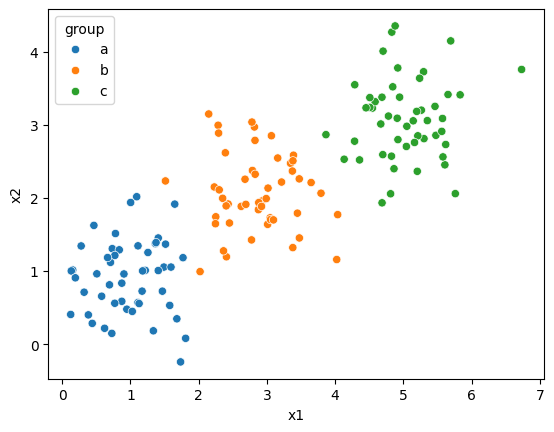

In [16]:
sns.scatterplot(data = df0_5, x = "x1",y = "x2", hue = "group")

<Axes: xlabel='x1', ylabel='x2'>

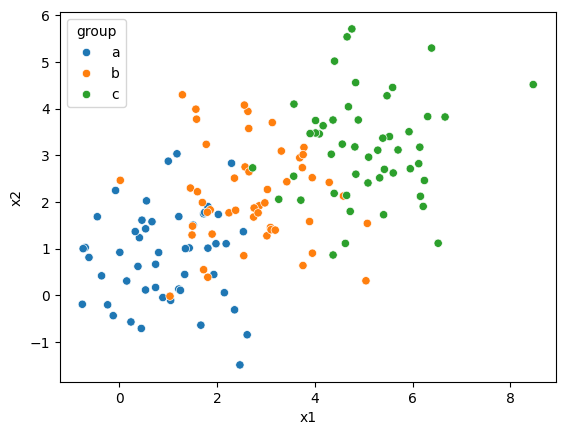

In [17]:
sns.scatterplot(data = df1_0, x = "x1",y = "x2", hue = "group")

<Axes: xlabel='x1', ylabel='x2'>

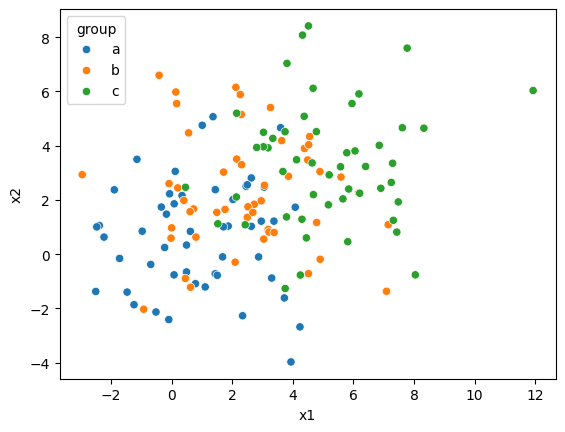

In [18]:
sns.scatterplot(data = df2_0, x = "x1",y = "x2", hue = "group")

In [19]:
def maxmin(x): 
    x = (x-min(x))/(max(x)-min(x))
    return x

It seems that the clusters become more separated as the noise increases

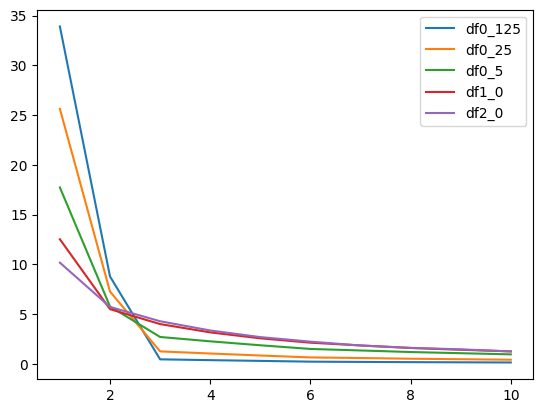

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
dataset_labels = ['df0_125', 'df0_25', 'df0_5', 'df1_0', 'df2_0']  

k_bar = 10
k_grid = np.arange(1, k_bar+1) 

for data, label in zip(datasets, dataset_labels):
    normalized2 = data.loc[:, ['x1','x2']] 
    normalized2 = normalized2.apply(maxmin)
    SSE = np.zeros(k_bar) # We'll store the training error here
    
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0) # Create a model for k
        model = model.fit(normalized2) # Fit the model
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
        
    scree_plot = sns.lineplot(x=k_grid, y=SSE, label=label)  # Add label for the legend


plt.legend()  
plt.show()
